# Proyecto Final
# Métodos Matemáticos Computacionales para Ciencia de Datos

## Profa. Nora Isabel Pérez Quezadas
## Ayte. Rubén Sánchez Duque


## **Equipo 6:**

* Pérez Martínez Ángel Noel
* Rivera Hernández Milena Fernanda
* Cruz Mendoza Valentina Ayelen
* Monroy Villegas Isaac
* Zamora Antiga Ángel Javier


## Bibliotecas necesarias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Análisis exploratorio de datos

### Conjunto de datos

In [ ]:
data = pd.read_csv('StudentPerformanceFactors.csv')
data.tail(2)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68
6606,15,67,Medium,Low,Yes,9,94,Medium,Yes,0,Medium,Medium,Public,Positive,4,No,Postgraduate,Near,Male,64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
# i. Número de registros del archivo
total_registros = len(data)

# ii. Número de valores faltantes por cada campo
valores_faltantes = data.isnull().sum()

# iii. Completitud de cada campo: 1 - (faltantes / total_registros)
completitud = (1 - (valores_faltantes / total_registros)) * 100

# iv. Número de registros duplicados (considerando todas las columnas)
duplicados = data.duplicated().sum()

print(f"Número total de registros: {total_registros}")
print(f"Número de registros duplicados: {duplicados}")
print("\nValores Faltantes y Completitud por Campo:")

# Crear un DataFrame de resumen para valores faltantes y completitud
data_perfil = pd.DataFrame({
    'Valores Faltantes': valores_faltantes,
    'Completitud (%)': completitud.round(2)
})
print(data_perfil)

Número total de registros: 6607
Número de registros duplicados: 0

Valores Faltantes y Completitud por Campo:
                            Valores Faltantes  Completitud (%)
Hours_Studied                               0           100.00
Attendance                                  0           100.00
Parental_Involvement                        0           100.00
Access_to_Resources                         0           100.00
Extracurricular_Activities                  0           100.00
Sleep_Hours                                 0           100.00
Previous_Scores                             0           100.00
Motivation_Level                            0           100.00
Internet_Access                             0           100.00
Tutoring_Sessions                           0           100.00
Family_Income                               0           100.00
Teacher_Quality                            78            98.82
School_Type                                 0           100.00
Peer_Inf

### Gráfica de pares

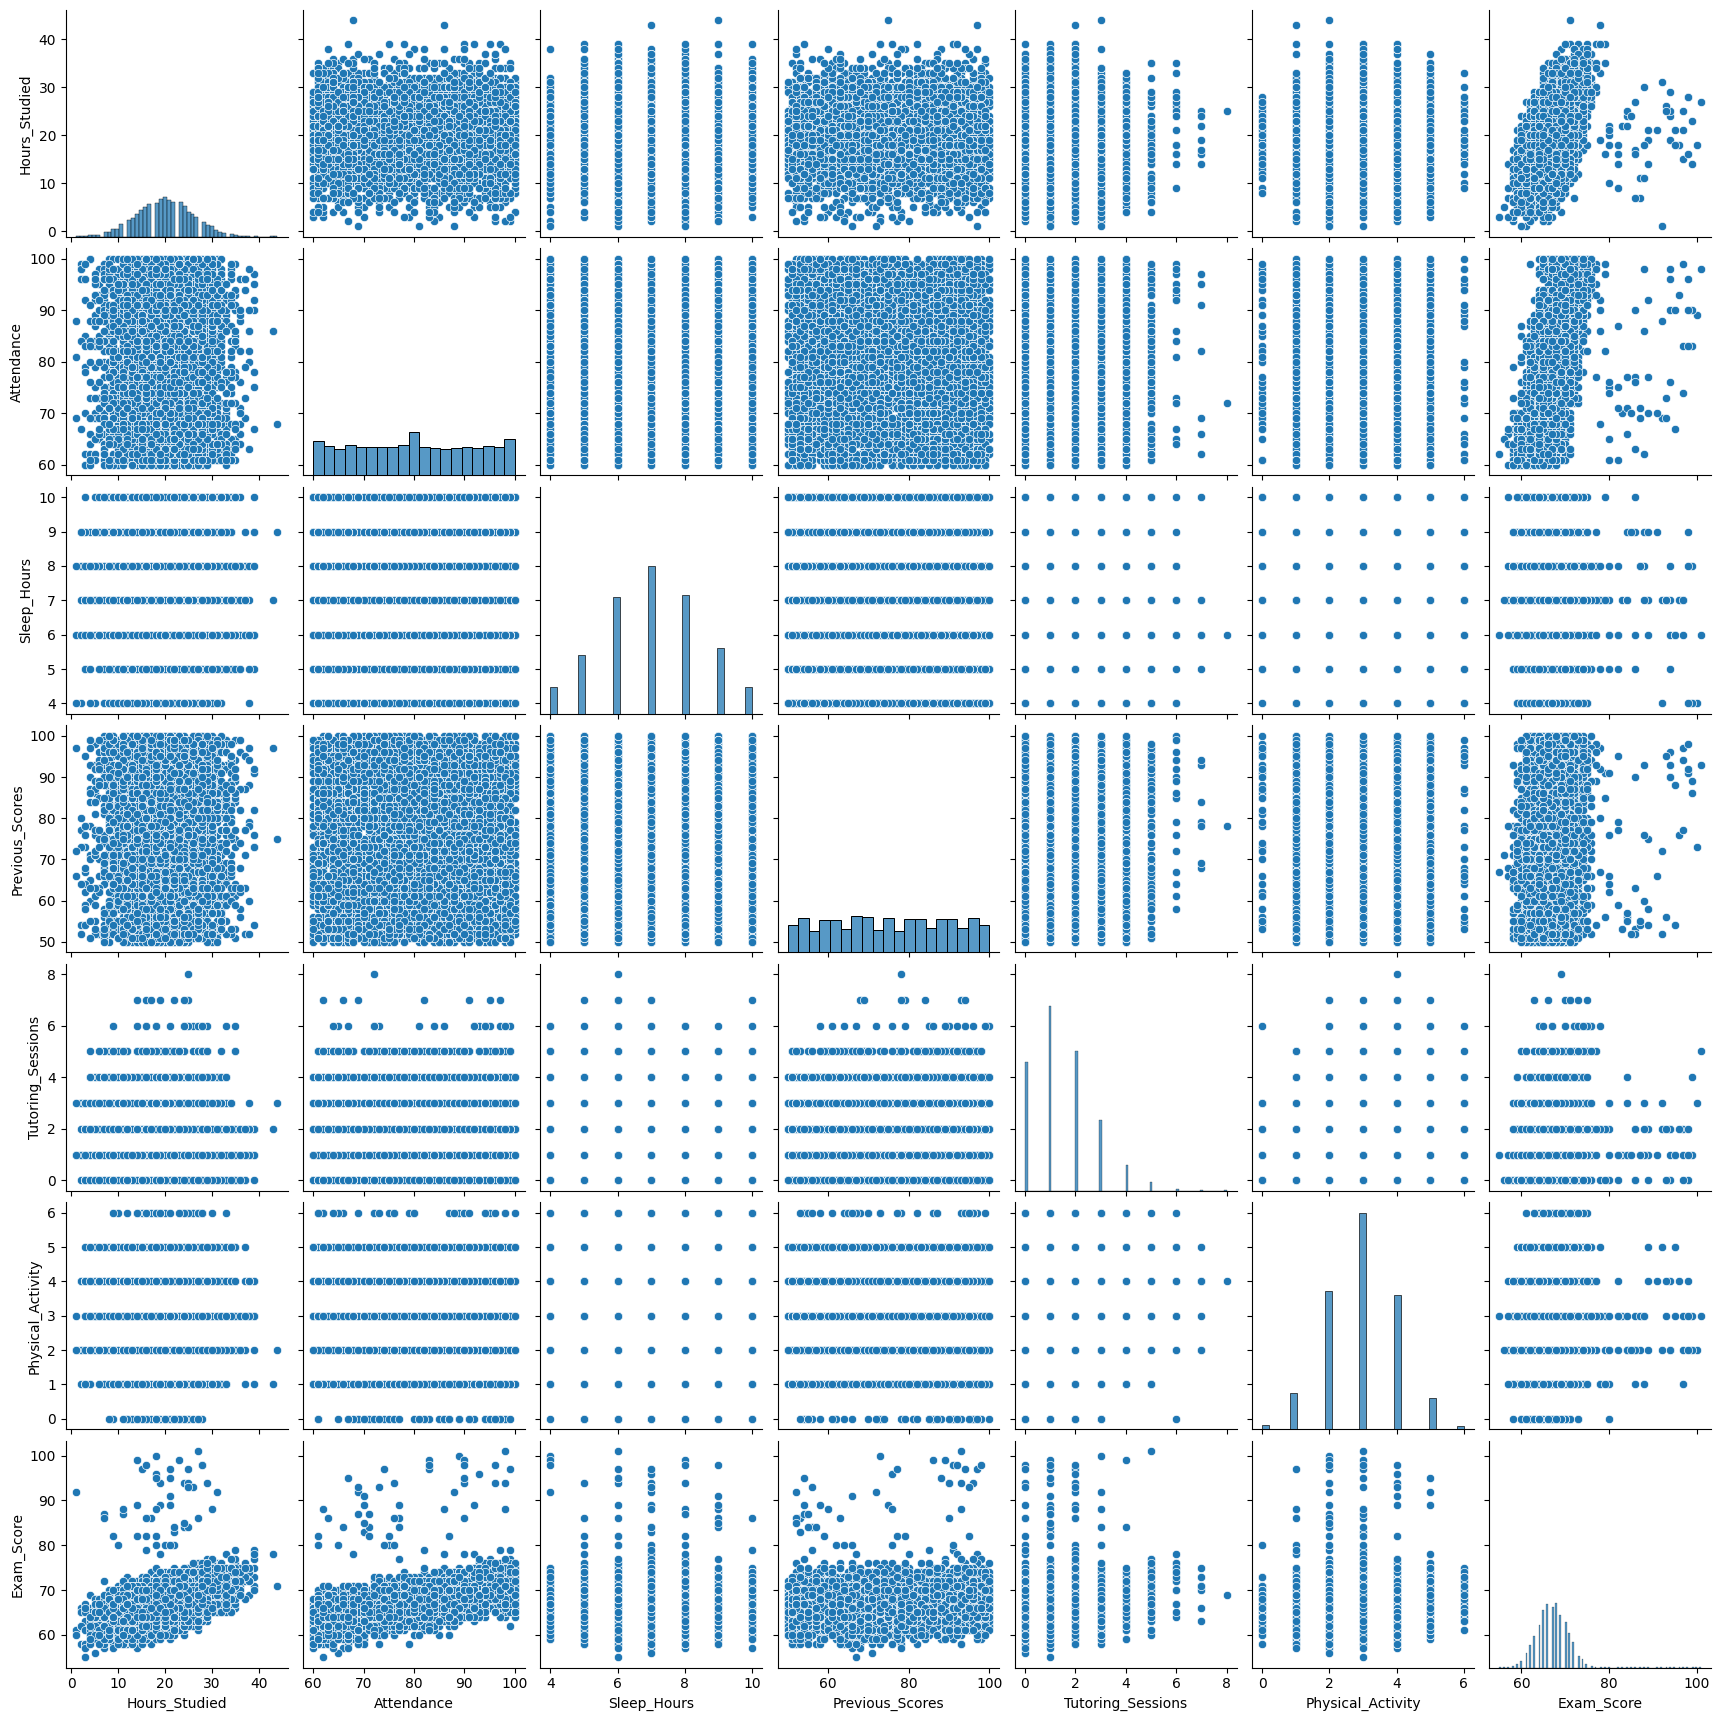

In [ ]:
sns.pairplot(data)
plt.show()

# Preprocesamiento

### Mapeo de datos

In [ ]:
medida_map = {'Low': 1, 'Medium': 2, 'High': 3,
              'Yes': 1, 'No': 0,
              'Positive': 2, 'Negative': 0, 'Neutral': 1,
              'Near': 1, 'Moderate': 2, 'Far': 3,
              'Male': 0, 'Female': 1,
              'Public': 0, 'Private': 1,
              'High School': 1, 'College': 2, 'Postgraduate': 3}

for column in data.columns:
  if data[column].dtype == 'object':
    data[column] = data[column].map(medida_map)

display(data.tail())

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
6602,25,69,3,2,0,7,76,2,1,1,3,2.0,0,2,2,0,1.0,1.0,1,68
6603,23,76,3,2,0,8,81,2,1,3,1,3.0,0,2,2,0,1.0,1.0,1,69
6604,20,90,2,1,1,6,65,1,1,3,1,2.0,0,0,2,0,3.0,1.0,1,68
6605,10,86,3,3,1,6,91,3,1,2,1,2.0,1,2,3,0,1.0,3.0,1,68
6606,15,67,2,1,1,9,94,2,1,0,2,2.0,0,2,4,0,3.0,1.0,0,64


### Sustituir datos nulos

In [ ]:
# Sustitución por columna
for col in data.columns.values:
    falta = np.sum(data[col].isnull())
    if falta:
        print(f'Asignando {falta} valores en columna {col}')
        med = data[col].median()
        data[col] = data[col].fillna(med)

Asignando 78 valores en columna Teacher_Quality
Asignando 90 valores en columna Parental_Education_Level
Asignando 67 valores en columna Distance_from_Home


In [ ]:
data.info() #Verificación de datos no nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               6607 non-null   int64  
 1   Attendance                  6607 non-null   int64  
 2   Parental_Involvement        6607 non-null   int64  
 3   Access_to_Resources         6607 non-null   int64  
 4   Extracurricular_Activities  6607 non-null   int64  
 5   Sleep_Hours                 6607 non-null   int64  
 6   Previous_Scores             6607 non-null   int64  
 7   Motivation_Level            6607 non-null   int64  
 8   Internet_Access             6607 non-null   int64  
 9   Tutoring_Sessions           6607 non-null   int64  
 10  Family_Income               6607 non-null   int64  
 11  Teacher_Quality             6607 non-null   float64
 12  School_Type                 6607 non-null   int64  
 13  Peer_Influence              6607 

# Gráficas exploratorias

### Gráfica de pares con datos mapeados

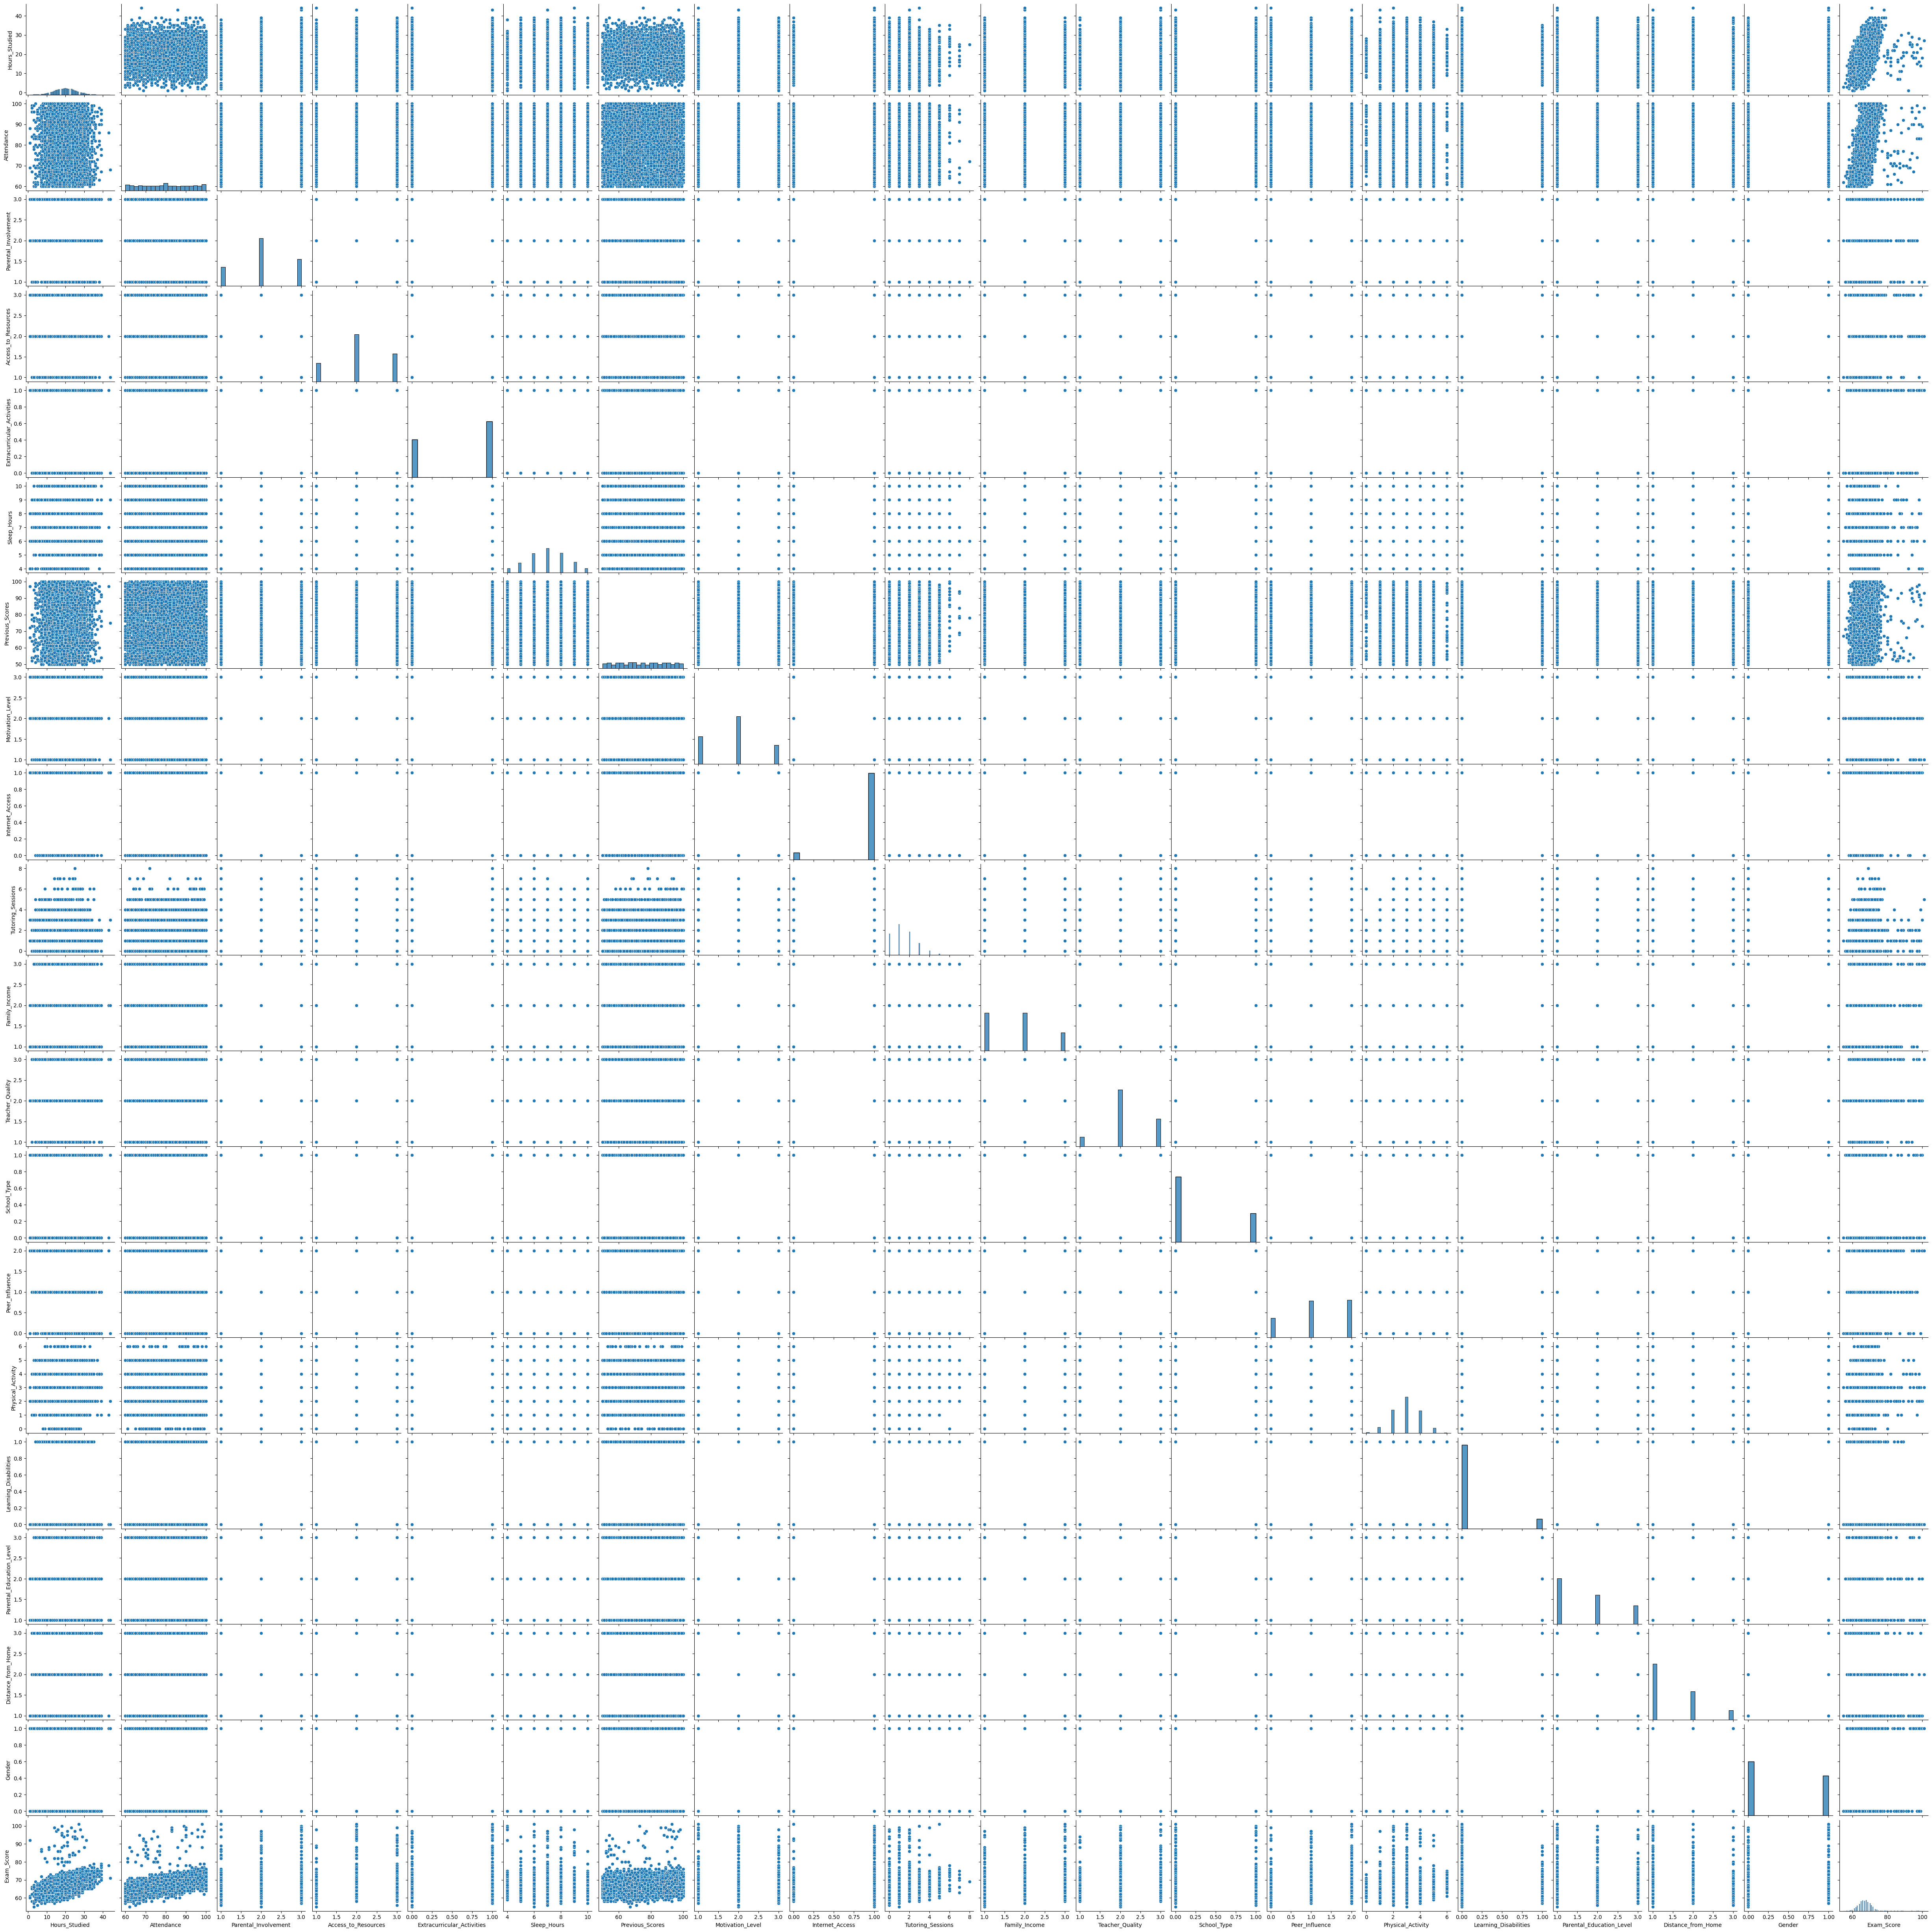

In [ ]:
sns.pairplot(data) # 20 vs 20 caracteristicas
plt.show()

### Histograma y Boxplot de Exam Score

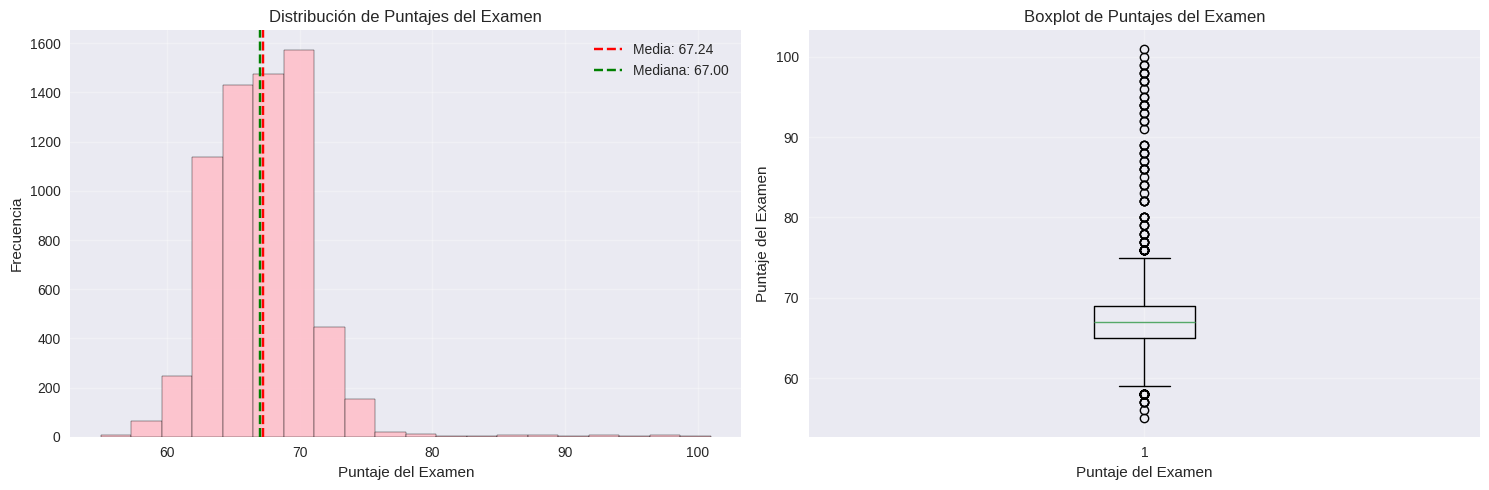

Estadísticas descriptivas de Exam_Score:
count    6607.000000
mean       67.235659
std         3.890456
min        55.000000
25%        65.000000
50%        67.000000
75%        69.000000
max       101.000000
Name: Exam_Score, dtype: float64


In [ ]:
# Histograma y Boxplot de "Exam_Score"
# Configuración inicial
plt.style.use('seaborn-v0_8')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Histograma
ax1.hist(data['Exam_Score'], bins=20, color='pink', edgecolor='black', alpha=0.9)
ax1.set_xlabel('Puntaje del Examen')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Distribución de Puntajes del Examen')
ax1.grid(True, alpha=0.3)

# Añadir estadísticas descriptivas al histograma
mean_score = data['Exam_Score'].mean()
median_score = data['Exam_Score'].median()
ax1.axvline(mean_score, color='red', linestyle='--', label=f'Media: {mean_score:.2f}')
ax1.axvline(median_score, color='green', linestyle='--', label=f'Mediana: {median_score:.2f}')
ax1.legend()

# Boxplot
ax2.boxplot(data['Exam_Score'])
ax2.set_xlabel('Puntaje del Examen')
ax2.set_ylabel('Puntaje del Examen')
ax2.set_title('Boxplot de Puntajes del Examen')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas descriptivas
print("Estadísticas descriptivas de Exam_Score:")
print(data['Exam_Score'].describe())

### Histograma y Boxplot de Horas de sueño

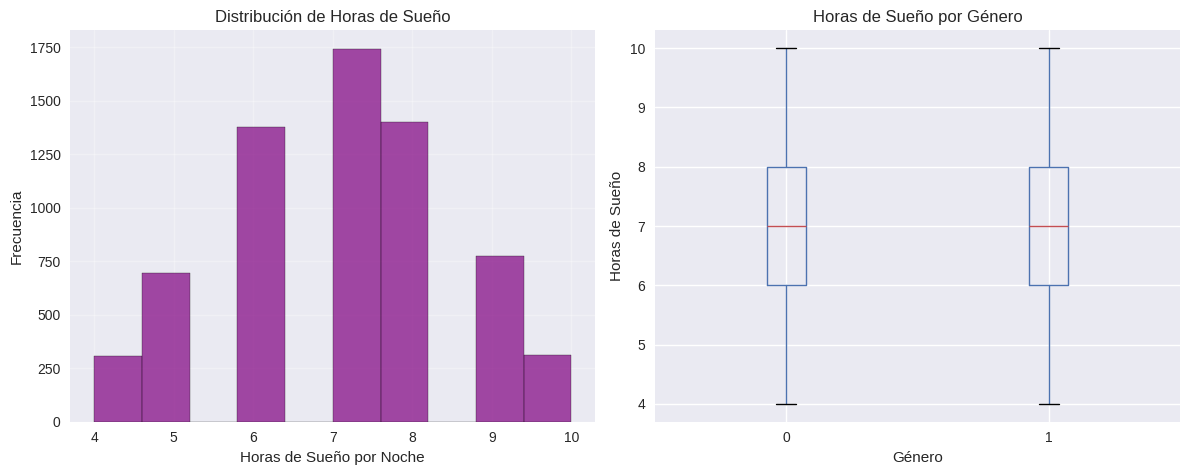

In [ ]:
# distribución de sueño
plt.figure(figsize=(12, 5))

# Histograma de Sleep_Hours
plt.subplot(1, 2, 1)
plt.hist(data['Sleep_Hours'], bins=10, color='purple', alpha=0.7, edgecolor='black')
plt.xlabel('Horas de Sueño por Noche')
plt.ylabel('Frecuencia')
plt.title('Distribución de Horas de Sueño')
plt.grid(True, alpha=0.3)

# Boxplot de Sleep_Hours por género
plt.subplot(1, 2, 2)
data.boxplot(column='Sleep_Hours', by='Gender', ax=plt.gca())
plt.title('Horas de Sueño por Género')
plt.suptitle('')  # Eliminar título automático
plt.xlabel('Género')
plt.ylabel('Horas de Sueño')

plt.tight_layout()
plt.show()

### Heatmap de correlaciones

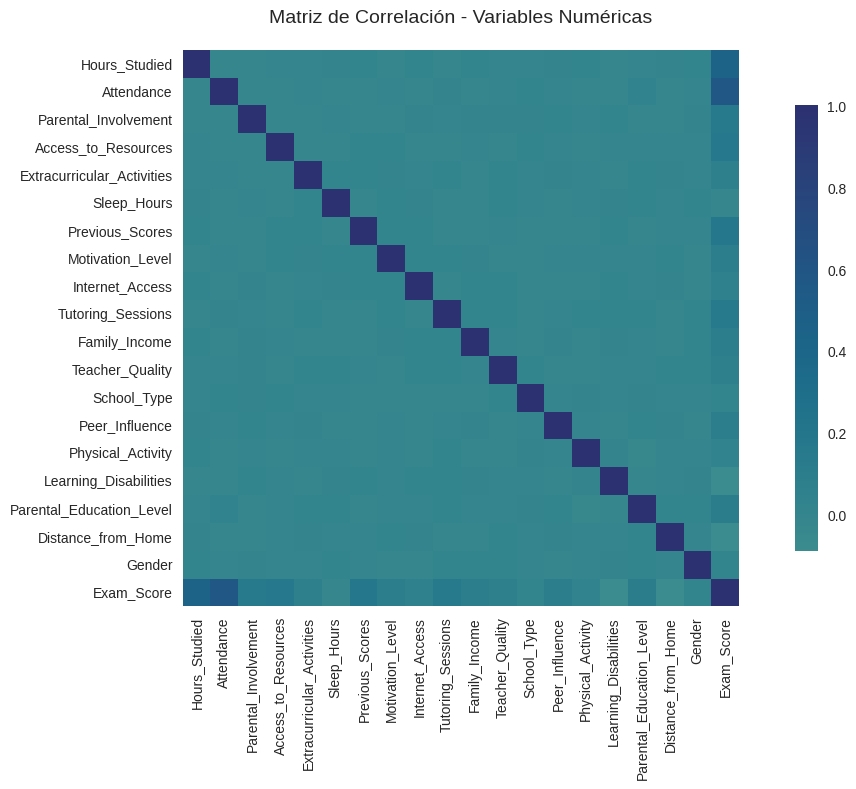

In [ ]:
# Heatmap de Correlaciones entre Variables Numéricas
# Seleccionar solo variables numéricas
numeric_columns = data.select_dtypes(include=[np.number]).columns
numeric_data = data[numeric_columns]

# Calcular matriz de correlación
correlation_matrix = numeric_data.corr()

# Crear heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix,
            annot=False,
            cmap='crest',
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={'shrink': 0.8})
plt.title('Matriz de Correlación - Variables Numéricas', fontsize=14, pad=20)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Gráfica comparativa de rendimiento por género

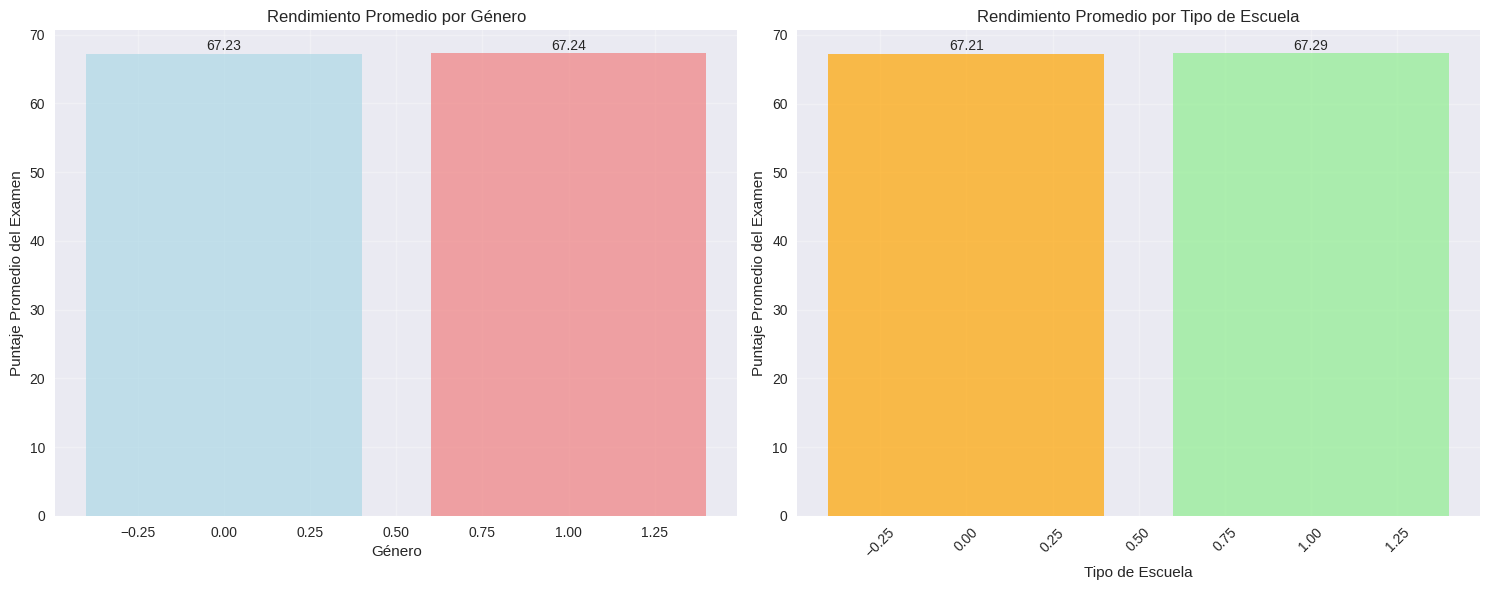

In [ ]:
# Gráfico de Barras Comparando Rendimiento por Género y Tipo de Escuela
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Por género
gender_performance = data.groupby('Gender')['Exam_Score'].mean().sort_values(ascending=False)
bars1 = ax1.bar(gender_performance.index, gender_performance.values,
                color=['lightcoral', 'lightblue'], alpha=0.7)
ax1.set_xlabel('Género')
ax1.set_ylabel('Puntaje Promedio del Examen')
ax1.set_title('Rendimiento Promedio por Género')
ax1.grid(True, alpha=0.3)

# Añadir valores en las barras
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.2f}', ha='center', va='bottom')

# Por tipo de escuela
school_performance = data.groupby('School_Type')['Exam_Score'].mean().sort_values(ascending=False)
bars2 = ax2.bar(school_performance.index, school_performance.values,
                color=['lightgreen', 'orange', 'purple'], alpha=0.7)
ax2.set_xlabel('Tipo de Escuela')
ax2.set_ylabel('Puntaje Promedio del Examen')
ax2.set_title('Rendimiento Promedio por Tipo de Escuela')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

# Añadir valores en las barras
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
sum(data['Internet_Access'])/ len(data['Internet_Access']) # promedio de acceso a internet

0.924474042682004

In [ ]:
sum(data['Extracurricular_Activities'])/ len(data['Extracurricular_Activities']) # promedio de personas que hacer alguna actividad extracurricular

0.5960345088542455

### Gráfica Horas de estudio vs Calificaciones

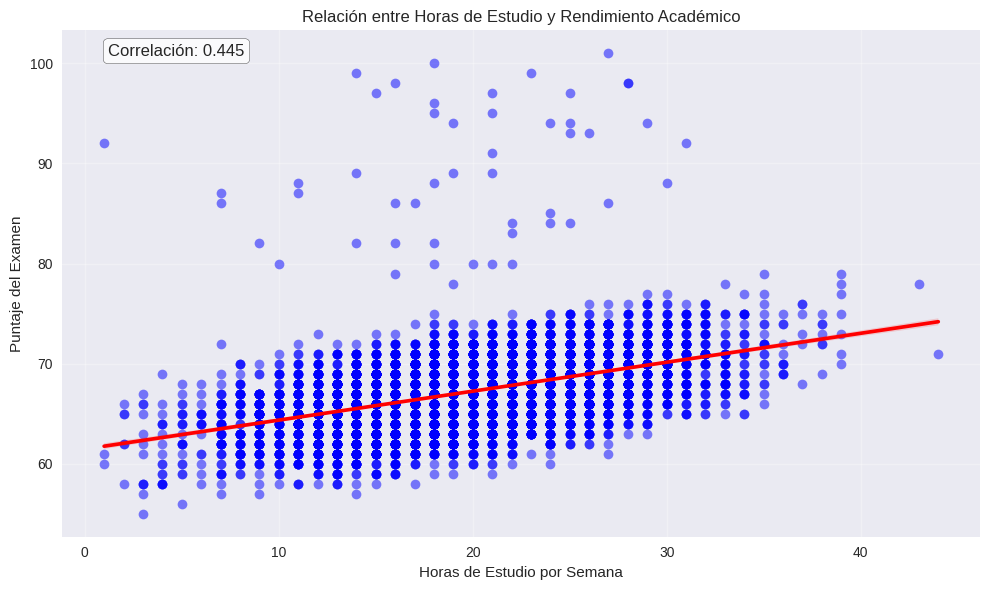

In [ ]:
#Scatter Plot: Horas de Estudio vs Calificaciones
plt.figure(figsize=(10, 6))

# Crear scatter plot con regresión lineal
sns.regplot(x='Hours_Studied', y='Exam_Score', data=data,
            scatter_kws={'alpha':0.5, 'color':'blue'},
            line_kws={'color':'red'})

plt.xlabel('Horas de Estudio por Semana')
plt.ylabel('Puntaje del Examen')
plt.title('Relación entre Horas de Estudio y Rendimiento Académico')
plt.grid(True, alpha=0.3)

# Calcular correlación
correlation = data['Hours_Studied'].corr(data['Exam_Score'])
plt.text(0.05, 0.95, f'Correlación: {correlation:.3f}',
         transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

# Clase PCA propia

In [ ]:
class PCA_propio():
  """ PCA_propio
  Implementacion propia del PCA basado en Programacion Orientada a Objetos.
  -----
  Params:
    n_pca: int
    Número de componentes a conservar; default = None
  -----
  Atributos:
    var_exp_ : 1d_array
      Varianza explicada individual
    cum_var_exp_ : 1d_array
      Varianza explicada acumulativa
    w_ : 2d_array
      Matriz de transormación con los vectores propios de los n_pca primeras
      componentes ordenadas
    cov_mat:
      Matriz de covarianzas
    eig_vals:
      valores propios encontrados
    eig_vecs:
      vectores propios relacionados a los eig_vals
    eig_pairs:
      pares ordenados de valores y vectores propios
  """
  def __init__(self, n_pca: int = 3, scale_data: bool = True):

    self.n_pca = n_pca
    self.scale_data = scale_data
    self.w_ = None
    self.mean_ = None
    self.std_ = None
    self.var_exp_ = None
    self.cum_var_exp_ = None
    self.cov_mat = None
    self.eig_vals = None
    self.eig_vecs = None

  def fit(self, X):
    # Preprocesamiento
    self.mean_ = X.mean(axis=0)
    X_centered = X - self.mean_

    if self.scale_data:
        self.std_ = X.std(axis=0,ddof=0)
        self.std_[self.std_ == 0] = 1.0
        X_processed = X_centered / self.std_
    else:
        self.std_ = np.ones(X.shape[1])
        X_processed = X_centered

    # Matriz de covarianzas
    self.cov_mat = np.cov(X_processed.T)
    # Cálculo de eigenvalores y eigenvectores
    self.eig_vals, self.eig_vecs = np.linalg.eigh(self.cov_mat)

    # Ordenamiento de Eignenpares
    # Crear pares (eigenvalor, eigenvector)
    self.eig_pairs = [[np.abs(self.eig_vals[i]), self.eig_vecs[:, i]] for i in range(len(self.eig_vals))]

    # Ordenar explícitamente por eigenvalor (de mayor a menor)
    self.eig_pairs.sort(key=lambda x: x[0], reverse=True)

    # Separar eigenvalores y eigenvectores ordenados
    eig_vals_ordered = np.array([pair[0] for pair in self.eig_pairs])
    eig_vecs_ordered = np.array([pair[1] for pair in self.eig_pairs]).T

    # Selección de componentes
    n_components = self.n_pca if self.n_pca is not None else X.shape[1]
    n_components = min(n_components, X.shape[1])

    # Tomar los primeros n_components eigenvectores (ya ordenados)
    self.w_ = eig_vecs_ordered[:, :n_components]

    # Varianza explicada
    total_variance = np.sum(eig_vals_ordered)
    self.var_exp_ = eig_vals_ordered / total_variance
    # para hacerlo similar al de sklearn nos quedamos con la varianza de los n componentes
    #self.var_exp_ = self.var_exp_[:self.n_pca]
    # sumamos sobre los n componentes para obtener varianza acumulada
    self.cum_var_exp_ = np.cumsum(self.var_exp_)

    return self

  def transform(self, X):
      if self.w_ is None:
          raise RuntimeError("Debes llamar a fit() antes de transformar los datos.")

      X_processed = (X - self.mean_) / self.std_
      return X_processed.dot(self.w_)

# Aplicación de PCA

###Aplicación PCA propia

**NOTA:** Instanciamos y aplicamos la transfoarmación con 15 componentes solo para obtener inicialmente los vectores propios que nos permitiran conocer cuántos atributos nos convienen realmente.

In [ ]:
# iniciamos la instancia
pca = PCA_propio(n_pca=10) # Instanciamos nuestra clase
pca.fit(data) # Ajustamos nuestros datos limpios
X_pca = pca.transform(data) # Transformamos
display(X_pca)

,0,1,2,3,4,5,6,7,8,9
0,0.022576,-1.089529,-0.612995,0.770054,0.138109,1.290151,0.432343,1.159139,0.388200,1.025560
1,2.478603,0.048643,0.038948,0.897876,0.967772,-0.573684,-0.186158,0.031926,1.896871,0.653426
2,-2.712503,-0.353886,-0.646018,-0.014440,-0.417432,-1.067739,0.181913,0.320009,0.235200,0.522095
3,-1.382150,-2.679997,-0.335657,0.655537,0.707872,-1.246600,0.516388,0.210457,0.121671,0.647593
4,-1.260866,1.094824,-0.019228,0.235542,-0.456836,-1.430365,0.300781,-1.326758,-0.310248,0.193205
...,...,...,...,...,...,...,...,...,...,...
6602,-0.207969,0.098837,2.700731,-0.516357,-0.463581,1.383144,-0.775137,-0.022183,0.648199,0.449643
6603,-0.709912,0.582501,1.559246,0.130564,0.812081,-0.012784,-0.341043,-0.738627,-0.471807,0.879139
6604,-0.393462,1.669648,-1.032849,-0.209109,0.613398,-1.564830,-0.658284,-0.884603,0.876442,2.021242
6605,-0.266853,-0.311473,-0.643550,-0.178097,-0.579869,1.064616,0.421017,-0.636342,-1.606383,-1.565411


In [ ]:
print('Matriz de Covarianza: \n')
display(pd.DataFrame(pca.cov_mat)) # Obtenemos nuestra Matriz de covarianza
# NOTA: convertimos a dataframe solo para que se viera mejor

Matriz de Covarianza: 



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000151,-0.009909,-0.016094,-0.005453,-0.006018,0.010978,0.024850,-0.010397,0.005039,-0.014284,0.000762,-0.003904,-0.000299,0.009700,0.004625,-0.014403,-0.007247,0.013565,0.004241,0.445522
1,-0.009909,1.000151,-0.009315,-0.011510,-0.002223,-0.015920,-0.020189,-0.005011,-0.018320,0.014326,-0.012776,-0.000965,0.018647,-0.007520,-0.022438,-0.022235,0.026240,-0.018745,-0.008042,0.581160
2,-0.016094,-0.009315,1.000151,-0.026561,-0.021885,-0.007946,-0.021077,-0.022397,0.012459,-0.002107,0.012385,0.012955,0.016738,0.021316,-0.005384,0.006340,-0.008209,-0.008252,0.016135,0.157138
3,-0.005453,-0.011510,-0.026561,1.000151,-0.008206,-0.014507,0.023868,0.006207,-0.013948,-0.011776,-0.004211,-0.010629,0.020596,-0.001247,-0.009998,-0.006103,-0.003865,-0.001958,0.000066,0.169796
4,-0.006018,-0.002223,-0.021885,-0.008206,1.000151,0.001379,0.004355,0.016118,-0.005346,0.003193,-0.009042,0.017639,-0.005656,0.009143,-0.001032,-0.008290,0.004454,0.013230,-0.007946,0.064391
5,0.010978,-0.015920,-0.007946,-0.014507,0.001379,1.000151,-0.021754,0.001031,0.011903,-0.012218,-0.018918,0.006829,-0.002776,-0.016869,-0.000378,0.015395,0.006216,-0.001739,0.007480,-0.017024
6,0.024850,-0.020189,-0.021077,0.023868,0.004355,-0.021754,1.000151,0.006461,0.004305,-0.013124,-0.013663,-0.003594,-0.013454,-0.017985,-0.011275,0.007058,-0.012757,-0.005941,-0.001021,0.175106
7,-0.010397,-0.005011,-0.022397,0.006207,0.016118,0.001031,0.006461,1.000151,0.019206,0.001259,0.011066,-0.012521,-0.013756,-0.000302,-0.007389,-0.000703,-0.006568,0.002267,-0.013984,0.086951
8,0.005039,-0.018320,0.012459,-0.013948,-0.005346,0.011903,0.004305,0.019206,1.000151,-0.010072,0.002343,0.000411,-0.012788,-0.010431,-0.012869,0.006518,-0.003590,0.010508,-0.015141,0.051483
9,-0.014284,0.014326,-0.002107,-0.011776,0.003193,-0.012218,-0.013124,0.001259,-0.010072,1.000151,0.005084,0.001464,-0.008259,-0.005140,0.017736,0.007565,0.002690,-0.017656,0.006735,0.156549


##**Obtener los vectores propios, sus entradas nos dicen que variables son las que más influyen en los componentes principales**

In [ ]:
# extraemos los eigenvectores
lista_solo_vectores = [par[1] for par in pca.eig_pairs]
print('Obtener vectores propios: \n')
display(pd.DataFrame(lista_solo_vectores)) # nuevamente convertimos a dataframe para mejorar la visualizacion

Obtener vectores propios: 



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.370317,-0.490099,-0.114101,-0.133276,-0.050120,0.031172,-0.143185,-0.066019,-0.031292,-0.132096,-0.073785,-0.060612,-0.019608,-0.085788,-0.002237,0.091583,-0.096950,0.082797,0.002344,-0.709647
1,-0.318686,0.271479,0.398525,-0.260927,-0.146172,-0.010743,-0.484622,-0.293787,-0.178520,0.215883,0.066949,0.131625,0.241366,0.066356,-0.007804,0.020416,0.199060,-0.177246,0.143509,-0.011247
2,0.255401,-0.268795,0.428380,-0.224606,-0.208968,0.029807,0.037950,-0.007994,0.273865,0.065063,0.383308,-0.005577,-0.262452,0.184557,0.122269,0.306214,-0.332806,-0.046154,0.174544,0.035986
3,0.040599,-0.008054,-0.080174,0.230926,-0.226819,-0.057213,0.202916,-0.195208,-0.293837,0.213399,-0.204839,-0.159220,0.188979,-0.276600,0.477562,0.206024,-0.295213,-0.330261,0.162221,0.008387
4,0.354431,-0.063822,0.100664,-0.138793,-0.022481,0.475127,0.025559,-0.320470,0.137105,-0.271670,-0.378277,0.310050,0.191459,-0.213050,0.018381,0.038475,0.086144,0.212906,0.206645,0.012619
5,0.120266,-0.163153,0.213384,0.361631,-0.260578,-0.333892,0.102629,-0.302263,-0.202155,-0.401862,0.089894,-0.098801,0.273252,0.345708,-0.149218,-0.196016,0.012206,0.152641,0.050444,-0.016207
6,0.198991,-0.057168,-0.019580,-0.234079,0.293323,-0.050070,-0.241879,-0.074657,-0.175045,0.097238,-0.215702,-0.051581,-0.018249,0.421045,0.515821,-0.251271,-0.203625,0.241502,-0.231157,0.002819
7,0.025230,0.120506,0.067079,-0.023949,-0.417479,0.194866,-0.211453,0.160730,0.394699,-0.213879,-0.088127,-0.435823,0.221491,-0.056411,0.141988,-0.099048,0.006066,-0.135392,-0.444005,0.001251
8,0.247812,0.010692,-0.324159,-0.050417,-0.191127,0.285724,-0.202416,-0.067821,-0.282127,0.050632,0.154030,-0.497368,-0.257393,0.110934,-0.039435,0.022910,0.323866,0.095976,0.345050,-0.007556
9,0.016818,0.114220,-0.004711,-0.376844,-0.246323,-0.260460,0.218777,-0.345925,0.040556,0.001157,-0.209415,-0.054849,-0.460049,-0.181219,-0.149949,-0.450589,-0.085078,-0.143112,-0.041151,-0.025946


Con esto podemos obtener los siguientes resultados respecto a la importancia de cada variable en cada componente: cada vector representa una Componente Principal y las entradas representan la influencia de cierta variable en esa componente. Asumiendo que aún no reducimos las dimensiones obtenemos lo siguiente:

1. Para la componente 1 la que más influencía es la variable 20 = Exam_scores con -0.70964745.

2. Para la componente 2 la que más influencía es la variable 7 = Previous_Scores con -0.48462183.

3. Para la componente 3 la que más influencía es la variable 3 = Parental_Involvement con 0.42838046.

4. Para la componente 4 la que más influencía es la variable 15 = Physical_Activity con 0.47756247.

5. Para la componente 5 la que más influencía es la variable 6 = Sleep_Hours con 0.47512713.

6. Para la componente 6 la que más influencía es la variable 10 = Tutoring_Sessions con -0.401862.

7. Para la componente 7 la que más influencía es la variable 15 = Physical_Activity con 0.51582127.

8. Para la componente 8 la que más influencía es la variable 19 = Gender con -0.44400501.

9. Para la componente 9 la que más influencía es la variable 12 = Teacher_Quality con -0.49736812.

10. Para la componente 10 la que más influencía es la variable 13 = School_Type con -0.46004853.

11. Para la componente 11 la que más influencía es la variable 18 = Distance_from_Home con -0.59702429.

12. Para la componente 12 la que más influencía es la variable 19 = Gender con -0.5582702.

13. Para la componente 13 la que más influencía es la variable 5 = Extracurricular_Activities con 0.39569092.

14. Para la componente 14 la que más influencía es la variable 10 = Tutoring_Sessions con -0.48505842.

15. Para la componente 15 la que más influencía es la variable 13 = School_Type con 0.40821919.

16. Para la componente 16 la que más influencía es la variable 8 = Motivation_Level con -0.50190751.

17. Para la componente 17 la que más influencía es la variable 15 = Physical_Activity con 0.5025795.

18. Para la componente 18 la que más influencía es la variable 3 = Parental_Involvement con 0.48014101.

19. Para la componente 19 la que más influencía es la variable 1 = Hours_Studied con 0.40155989.

20. Para la componente 20 la que más influencía es la variable 1 = Exam_score con -0.70165044.

### Aplicacion PCA sklearn

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Sklearn PCA equivalente
X_scaled = StandardScaler().fit_transform(data)
pca_sk = PCA(n_components = 10)
X_sk = pca_sk.fit_transform(X_scaled)
display(pd.DataFrame(X_sk))


,0,1,2,3,4,5,6,7,8,9
0,-0.022576,1.089529,-0.612995,0.770054,0.138109,-1.290151,0.432343,-1.159139,-0.388200,-1.025560
1,-2.478603,-0.048643,0.038948,0.897876,0.967772,0.573684,-0.186158,-0.031926,-1.896871,-0.653426
2,2.712503,0.353886,-0.646018,-0.014440,-0.417432,1.067739,0.181913,-0.320009,-0.235200,-0.522095
3,1.382150,2.679997,-0.335657,0.655537,0.707872,1.246600,0.516388,-0.210457,-0.121671,-0.647593
4,1.260866,-1.094824,-0.019228,0.235542,-0.456836,1.430365,0.300781,1.326758,0.310248,-0.193205
...,...,...,...,...,...,...,...,...,...,...
6602,0.207969,-0.098837,2.700731,-0.516357,-0.463581,-1.383144,-0.775137,0.022183,-0.648199,-0.449643
6603,0.709912,-0.582501,1.559246,0.130564,0.812081,0.012784,-0.341043,0.738627,0.471807,-0.879139
6604,0.393462,-1.669648,-1.032849,-0.209109,0.613398,1.564830,-0.658284,0.884603,-0.876442,-2.021242
6605,0.266853,0.311473,-0.643550,-0.178097,-0.579869,-1.064616,0.421017,0.636342,1.606383,1.565411


Observamos obtenemos los mismos resultados con el PCA de sklearn que con nuestra implementación.

In [ ]:
print("Varianza explicada tu PCA:", pca.var_exp_)
print("Varianza explicada sklearn:", pca_sk.explained_variance_ratio_)

Varianza explicada tu PCA: [0.09176634 0.05444912 0.05331813 0.0530073  0.05258542 0.05222896
 0.05188332 0.05104008 0.05059613 0.05004255 0.0494203  0.04907237
 0.04872608 0.04851757 0.04825883 0.04767639 0.04716304 0.04695438
 0.04602283 0.00727084]
Varianza explicada sklearn: [0.09176634 0.05444912 0.05331813 0.0530073  0.05258542 0.05222896
 0.05188332 0.05104008 0.05059613 0.05004255]


### Diferencias entre PCA propio vs PCA sklearn

In [ ]:
X_pca_np = X_pca.to_numpy()
display(pd.DataFrame(X_pca_np))

,0,1,2,3,4,5,6,7,8,9
0,0.022576,-1.089529,-0.612995,0.770054,0.138109,1.290151,0.432343,1.159139,0.388200,1.025560
1,2.478603,0.048643,0.038948,0.897876,0.967772,-0.573684,-0.186158,0.031926,1.896871,0.653426
2,-2.712503,-0.353886,-0.646018,-0.014440,-0.417432,-1.067739,0.181913,0.320009,0.235200,0.522095
3,-1.382150,-2.679997,-0.335657,0.655537,0.707872,-1.246600,0.516388,0.210457,0.121671,0.647593
4,-1.260866,1.094824,-0.019228,0.235542,-0.456836,-1.430365,0.300781,-1.326758,-0.310248,0.193205
...,...,...,...,...,...,...,...,...,...,...
6602,-0.207969,0.098837,2.700731,-0.516357,-0.463581,1.383144,-0.775137,-0.022183,0.648199,0.449643
6603,-0.709912,0.582501,1.559246,0.130564,0.812081,-0.012784,-0.341043,-0.738627,-0.471807,0.879139
6604,-0.393462,1.669648,-1.032849,-0.209109,0.613398,-1.564830,-0.658284,-0.884603,0.876442,2.021242
6605,-0.266853,-0.311473,-0.643550,-0.178097,-0.579869,1.064616,0.421017,-0.636342,-1.606383,-1.565411


Comparamos resultados del PCA propio con el de Sklearn:

In [ ]:
# Comparacion de varianza
# nuesta implementacion devuelve un data frame pero la de sklearn es un array
# entonces debemos convertir nuestro resultado a array
X_pca_np = X_pca.to_numpy()

# La varianza explicada NO depende de signos, así que debe ser IDÉNTICA.

print("Comparación de Varianza Explicada")
print(f"Clase propia:  {pca.var_exp_[:3]}")
print(f"Scikit-Learn:       {pca_sk.explained_variance_ratio_[:3]}")
print("-" * 30)

# --- COMPARACIÓN DE VALORES TRANSFORMADOS ---
print("\nComparación de la primera fila de datos")
print(f"Clase propia:  {X_pca_np[0]}")
print(f"Scikit-Learn:       {X_sk[0]}")

# Comprobación automática (considerando posible inversión de signo)
# Revisa si los valores son casi iguales (absolutos)
diferencia = np.abs(np.abs(X_pca_np[0]) - np.abs(X_sk[0]))
if np.all(diferencia < 1e-5):
    print("\n Los resultados coinciden")
else:
    print("\n Observamos que si hay diferencias. ")

Comparación de Varianza Explicada
Clase propia:  [0.09176634 0.05444912 0.05331813]
Scikit-Learn:       [0.09176634 0.05444912 0.05331813]
------------------------------

Comparación de la primera fila de datos
Clase propia:  [ 0.02257582 -1.08952942 -0.61299543  0.77005361  0.13810861  1.29015085
  0.43234301  1.15913861  0.38820034  1.02555959]
Scikit-Learn:       [-0.02257582  1.08952942 -0.61299543  0.77005361  0.13810861 -1.29015085
  0.43234301 -1.15913861 -0.38820034 -1.02555959]

 Los resultados coinciden


### Gráfica de codo para selección de caracteristicas

La elección de las 15 características se basó en las siguientes métricas.

Varianza Acumulada:  [0.09176634 0.14621547 0.1995336  0.2525409  0.30512632 0.35735529
 0.4092386  0.46027868 0.51087481 0.56091736 0.61033766 0.65941002
 0.70813611 0.75665367 0.80491251 0.8525889  0.89975194 0.94670632
 0.99272916 1.        ]


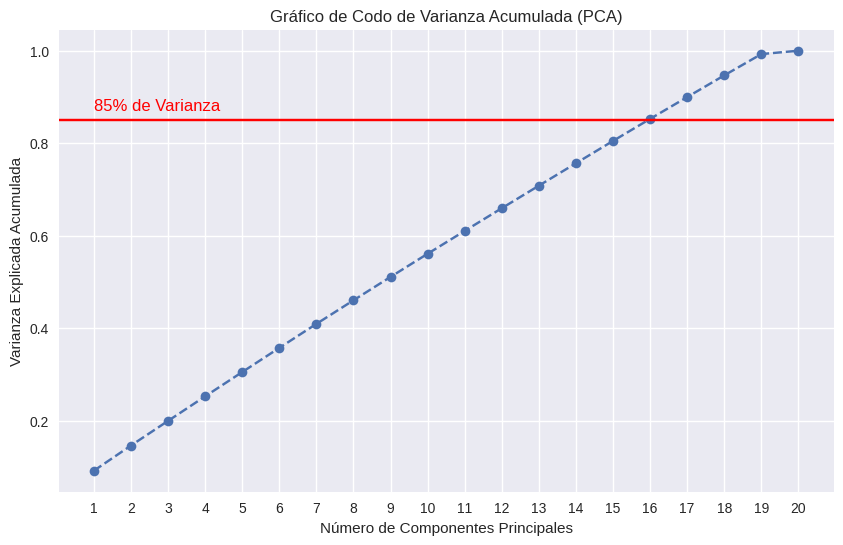

In [ ]:
varianza_acumulada = pca.cum_var_exp_
print('Varianza Acumulada: ', varianza_acumulada)

# Grafica del Codo
plt.figure(figsize=(10, 6))

# El eje X va desde 1 hasta el número total de componentes
num_componentes = len(varianza_acumulada)
componente_indices = range(1, num_componentes + 1)

plt.plot(componente_indices, varianza_acumulada, marker='o', linestyle='--')
plt.title('Gráfico de Codo de Varianza Acumulada (PCA)')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.xticks(range(1,21))
plt.grid(True)

# Línea para el umbral deseado
umbral = 0.85
plt.axhline(y=umbral, color='r', linestyle='-')
plt.text(1, umbral + 0.02, f'{int(umbral*100)}% de Varianza', color='r', fontsize=12)

plt.show()

[0.09176634 0.05444912 0.05331813 0.0530073  0.05258542 0.05222896
 0.05188332 0.05104008 0.05059613 0.05004255 0.0494203  0.04907237
 0.04872608 0.04851757 0.04825883 0.04767639 0.04716304 0.04695438
 0.04602283 0.00727084]


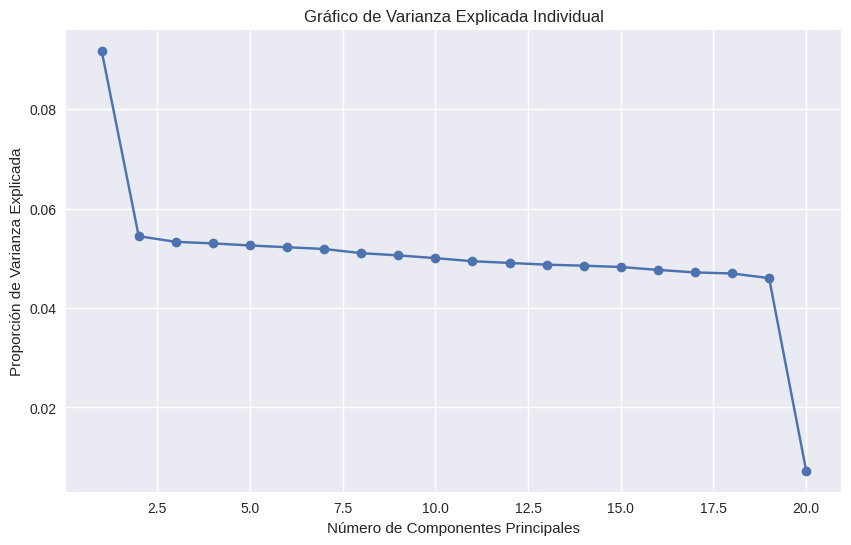

In [ ]:
# Gráfico de Varianza Individual (Proporción)
varianza_individual = pca.var_exp_
print(varianza_individual)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_individual) + 1), varianza_individual, marker='o')
plt.title('Gráfico de Varianza Explicada Individual')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Proporción de Varianza Explicada')
plt.grid(True)
plt.show()

Esto nos indica que la primera componente apenas explica un (0.09) y las siguientes bajan muy suavemente. Esto significa que la información está muy "diluida" o dispersa entre todas las variables. Las variables originales no tienen una correlación fuerte entre sí, o bien, los datos contienen mucho ruido.

**Con esto tomamos la decisión de quedarnos con 16 características para conservar el 85% de la varianza.**

In [ ]:
# con 16 componentes
pca_16 = PCA_propio(n_pca=16)
pca_16.fit(data)
X_pca_16 = pca_16.transform(data)
display(X_pca_16)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.022576,-1.089529,-0.612995,0.770054,0.138109,1.290151,0.432343,1.159139,0.388200,1.025560,1.047453,0.357622,-0.489045,-0.070733,-1.836774,0.637255
1,2.478603,0.048643,0.038948,0.897876,0.967772,-0.573684,-0.186158,0.031926,1.896871,0.653426,-0.669369,0.294923,-1.803446,-0.555629,0.600839,0.812188
2,-2.712503,-0.353886,-0.646018,-0.014440,-0.417432,-1.067739,0.181913,0.320009,0.235200,0.522095,-0.270600,0.849470,1.116549,-0.616583,0.251465,0.045732
3,-1.382150,-2.679997,-0.335657,0.655537,0.707872,-1.246600,0.516388,0.210457,0.121671,0.647593,0.027870,1.084353,-0.324571,1.015030,0.484735,0.681733
4,-1.260866,1.094824,-0.019228,0.235542,-0.456836,-1.430365,0.300781,-1.326758,-0.310248,0.193205,-0.067747,-0.521762,-0.624634,-0.306652,0.564843,0.463952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,-0.207969,0.098837,2.700731,-0.516357,-0.463581,1.383144,-0.775137,-0.022183,0.648199,0.449643,1.126360,-0.709766,-0.239866,-0.186447,0.445734,-0.179168
6603,-0.709912,0.582501,1.559246,0.130564,0.812081,-0.012784,-0.341043,-0.738627,-0.471807,0.879139,0.667683,-1.646288,-0.561757,-1.120575,-0.991315,-1.273355
6604,-0.393462,1.669648,-1.032849,-0.209109,0.613398,-1.564830,-0.658284,-0.884603,0.876442,2.021242,-1.054453,-0.021357,0.770589,-0.548503,0.920803,0.907844
6605,-0.266853,-0.311473,-0.643550,-0.178097,-0.579869,1.064616,0.421017,-0.636342,-1.606383,-1.565411,-1.910376,-2.943434,0.360826,0.627355,-0.321425,-0.160438


In [ ]:
# comparamos con sklearn
# con 16 componentes
pca_sk16 = PCA(n_components = 16)
X_sk16 = pca_sk16.fit_transform(X_scaled)
display(pd.DataFrame(X_sk16))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.022576,1.089529,-0.612995,0.770054,0.138109,-1.290151,0.432343,-1.159139,-0.388200,-1.025560,-1.047453,-0.357622,-0.489045,0.070733,-1.836774,-0.637255
1,-2.478603,-0.048643,0.038948,0.897876,0.967772,0.573684,-0.186158,-0.031926,-1.896871,-0.653426,0.669369,-0.294923,-1.803446,0.555629,0.600839,-0.812188
2,2.712503,0.353886,-0.646018,-0.014440,-0.417432,1.067739,0.181913,-0.320009,-0.235200,-0.522095,0.270600,-0.849470,1.116549,0.616583,0.251465,-0.045732
3,1.382150,2.679997,-0.335657,0.655537,0.707872,1.246600,0.516388,-0.210457,-0.121671,-0.647593,-0.027870,-1.084353,-0.324571,-1.015030,0.484735,-0.681733
4,1.260866,-1.094824,-0.019228,0.235542,-0.456836,1.430365,0.300781,1.326758,0.310248,-0.193205,0.067747,0.521762,-0.624634,0.306652,0.564843,-0.463952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,0.207969,-0.098837,2.700731,-0.516357,-0.463581,-1.383144,-0.775137,0.022183,-0.648199,-0.449643,-1.126360,0.709766,-0.239866,0.186447,0.445734,0.179168
6603,0.709912,-0.582501,1.559246,0.130564,0.812081,0.012784,-0.341043,0.738627,0.471807,-0.879139,-0.667683,1.646288,-0.561757,1.120575,-0.991315,1.273355
6604,0.393462,-1.669648,-1.032849,-0.209109,0.613398,1.564830,-0.658284,0.884603,-0.876442,-2.021242,1.054453,0.021357,0.770589,0.548503,0.920803,-0.907844
6605,0.266853,0.311473,-0.643550,-0.178097,-0.579869,-1.064616,0.421017,0.636342,1.606383,1.565411,1.910376,2.943434,0.360826,-0.627355,-0.321425,0.160438


Observamos que obtenemos los mismos resultados.

# Extrapolación para predicción

## Algoritmos auxiliares

In [ ]:
# primero necesitamos la matriz de vandermonde
def matriz_vandermonde(vector_x, grado):
  """matriz_vandermonde
  Funcion auxiliar que construye la matriz de Vandermonde manualmente.
  Filas: m (numero de datos)
  Columnas: n + 1 (grado del polinomio + termino independiente)
  ---
  params:
    vector_x: vector x con la que la construiremos
    grado: el grado de la matriz a contruir
  ---
  return:
    V: matriz de Vandermonde
  """
  m = len(vector_x)
  n = grado

  # Inicializamos una matriz de ceros de tamanio m x (n+1)
  V = np.zeros((m, n + 1))

  for i in range(m): # Recorremos cada fila
      for j in range(n + 1): # Recorremos cada potencia (columna)
          # x^n, x^(n-1), ..., x^0
          potencia = n - j
          V[i, j] = vector_x[i] ** potencia

  return V

In [ ]:
# usaremos la implementacion de cholesky que ya teniamos

def Cholesky(A):
  '''Cholesky
  Funcion optimizada que simula el metodo de cholesky, donde A = L·L^T
  ------
  param:
    A: Matriz cuadrada y simetrica
  ------
  return:
    L: Matriz triangular inferior
  '''
  n = A.shape[0]

  # La matriz debe ser cuadrada.
  if A.shape[0] != A.shape[1]:
      raise ValueError("La matriz debe ser cuadrada.")
  # La matriz debe ser simétrica
  if not np.allclose(A, A.T):
      raise ValueError("La matriz no es simetrica.")

  # Inicializamos la matriz L con ceros.
  L = np.zeros((n, n), dtype=float)

  # Iteramos sobre las filas (i) y columnas (j) para calcular cada elemento de L.
  for i in range(n):
      for j in range(i + 1): # Solo calculamos la parte triangular inferior (j <= i).
          # Esta suma corresponde a la parte del producto punto de las filas ya calculadas.
          suma = np.dot(L[i, :j], L[j, :j])

          #Elementos en la diagonal
          if i == j:
              # El termino bajo la raiz cuadrada debe ser positivo.
              termino = A[i, i] - suma
              if termino <= 0:
                  # Si no es positivo, la matriz no es definida positiva y la factorizacion falla.
                  raise ValueError("La matriz no es definida positiva.")
              L[i, j] = np.sqrt(termino)
          # Elementos fuera de la diagonal (i != j).
          else:
              # El pivote L[j,j] no puede ser cero.
              if L[j, j] == 0:
                  raise ValueError("División por cero encontrada. El metodo falla.")
              L[i, j] = (A[i, j] - suma) / L[j, j]

  return L

In [ ]:
# y los solucionadores que ya habiamos programado

def Lx_b(L, b):
  '''Lx_b
  Funcion que resuelve un sistema Lx=b, donde L es matriz triangular inferior.
  ---
  params:
    L: matriz triangular inferior
    b: vector columna b
  ---
  return:
    x: vector solucion al sistema Lx=b
  '''

  # Obtenemos el tamanio de L
  m,n = L.shape
  # Verificamos que el numero de columnas de L corresponda con el numero de filas de b
  if n != len(b):
    raise ValueError('El numero de columnas de L debe ser igual al numero de filas de b')

  # Verificamos que L sea una matriz triangular inferior
  for i in range(m):
    for j in range(i+1, n):
      if abs(L[i][j]) > 1e-9:
        raise ValueError('L debe ser una matriz triangular inferior')

  # Inicializamos el vector solución x
  x = np.zeros(m)

  # Resolvemos el sistema
  for i in range(m):
    suma = 0.0
    for j in range(i):
      suma += L[i, j] * x[j]
    x[i] = (b[i] - suma) / L[i, i]

  return x

def Ux_b(U, b):
  '''Ux_b
  Funcion que resuelve un sistema Ux=b, donde U es matriz triangular superior.
  ---
  params:
    U: matriz triangular superior
    b: vector columna b
  ---
  return:
    x: vector solucion al sistema Ux=b
  '''
  # Obtenemos el tamanio de U
  m,n = U.shape
  # Verificamos que el numero de columnas de U corresponda con el numero de filas de b
  if n != len(b):
    raise ValueError('El numero de columnas de L debe ser igual al numero de filas de b')

  # Verificamos que U sea una matriz triangular superior
  for i in range(m):
    for j in range(i):
      if abs(U[i][j]) > 1e-9:
        raise ValueError('U debe ser una matriz triangular superior')

  # Inicializamos el vector solución x
  x = np.zeros(m)

  # Resolvemos el sistema
  # Empezamos desde la ultima fila hacia la primera
  for i in range(n - 1, -1, -1):
    suma = 0.0
    for j in range(i + 1, n):
      suma += U[i][j] * x[j]

    # Verificamos si la diagonal tiene un cero
    if abs(U[i][i]) < 1e-12:
      raise ValueError("El sistema no tiene solución única.")

    x[i] = (b[i] - suma) / U[i][i]
  return x

def Ax_b_cholesky(A, b):
  '''Ax_b_cholesky
  Funcion que resuelve un sistema Ax=b, despues de la factorizacion LL^T de A
  ---
  params:
    A: matriz simetrica y definida positiva
    b: vector columna b
  ---
  return:
    x: vector solucion al sistema Ax=b, con A = PLU
  '''

  # Encontramos la factorizacion LL^T de A con la funcion antes programada
  L = Cholesky(A)

  # Resolvemos Ly=b y luego L^Tx=y
  y = Lx_b(L, b)
  x = Ux_b(L.T, y)

  return x

## Interpolación

In [ ]:
def interpolacion(x, y, grado):
  """interpolacion
  Funcion que implementa la interpolacion.
  ---
  params:
    x: Vector de variables independientes. Dimension (m,).
    y: Vector de variables dependientes (valores a predecir). Dimension (m,).
    grado: Grado del polinomio deseado (n).
  ---
  return:
    a: Vector de coeficientes optimos del polinomio. Dimension (n+1,).
    norma_error: El valor escalar del error residual mínimo: ||Va - y||.
  """
  # Construimos V
  V = matriz_vandermonde(x, grado)

  # Resolvemos la Ecuación Normal (V^T V)a = V^T
  A_sistema = V.T @ V # Esta matriz es simetrica y def. positiva
  b_sistema = V.T @ y

  # a son los coeficientes y es el vector que buscamos
  # resolvemos con cholesky
  a = Ax_b_cholesky(A_sistema, b_sistema)

  # Calculamos el error ||Va - y||
  # y calculamos la prediccion con los puntos originales
  y_prediccion_puntos = V @ a

  # El residuo es la diferencia vector real - vector estimado
  residuo = y_prediccion_puntos - y

  norma_error = np.sqrt(np.sum(residuo**2))

  return a, norma_error

## Interpolación para variable destacable: Actividad Física

Coeficientes obtenidos (a): [ 0.00473866 -0.06226666  0.26851256 -0.43802186  0.33563306 -0.08116924]
Error residual: 0.0000


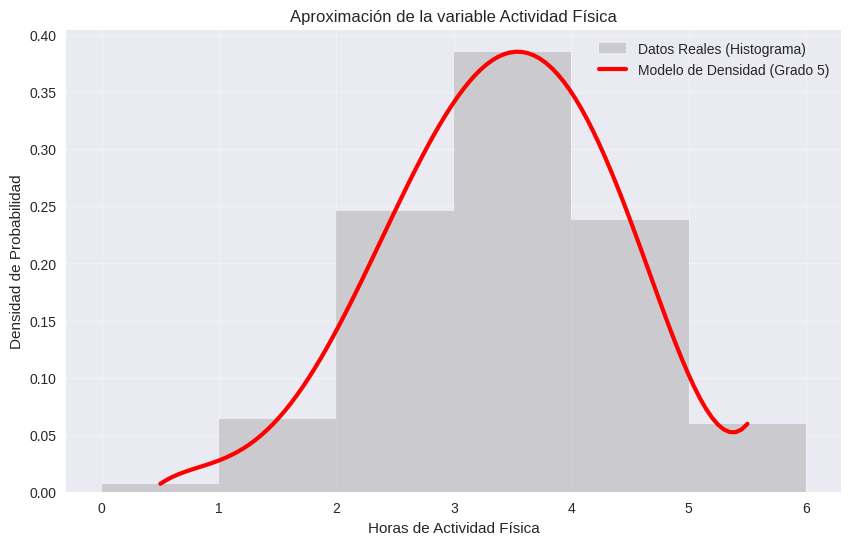

In [ ]:
datos_actividad = data['Physical_Activity'].values

# Generamos los datos del HISTOGRAMA (X = Centros de barra, Y = Densidad)
counts, bin_edges = np.histogram(datos_actividad, bins=6,density=True)

# Calculamos los puntos medios de cada bin (estos serán nuestros x_real)
x_hist_actividad = (bin_edges[:-1] + bin_edges[1:]) / 2
y_hist_actividad = counts

# Aplicamos la interpolacion a estos puntos del histograma
grado_polinomio2 = 5

coeficientes2, error2 = interpolacion(x_hist_actividad, y_hist_actividad, grado_polinomio2)

print(f"Coeficientes obtenidos (a): {coeficientes2}")
print(f"Error residual: {error2:.4f}")

# 4. Creamos el dominio suave para la curva
x_suave2 = np.linspace(x_hist_actividad.min(), x_hist_actividad.max(), 100)

# Calculamos los valores Y suaves
V_suave2 = matriz_vandermonde(x_suave2, grado_polinomio2)
y_suave2 = V_suave2 @ coeficientes2


plt.figure(figsize=(10, 6))

# Dibujamos el histograma real
plt.hist(datos_actividad, bins=6, alpha=0.3, density=True, color='gray', label='Datos Reales (Histograma)')

# Dibujamos la curva interpolada
plt.plot(x_suave2, y_suave2, color='red', linewidth=3, label=f'Modelo de Densidad (Grado {grado_polinomio2})')

plt.title(f"Aproximación de la variable Actividad Física")
plt.xlabel("Horas de Actividad Física")
plt.ylabel("Densidad de Probabilidad")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

## Aplicación a nuestro caso de datos después de aplicar PCA

Coeficientes obtenidos (a): [ 2.69308072e-07  3.05141696e-06 -1.35923239e-05 -2.16877964e-04
  2.07006021e-04  5.72546978e-03 -9.11574987e-04 -6.66148998e-02
  3.22876655e-04  2.90818606e-01]
Error residual: 0.0356


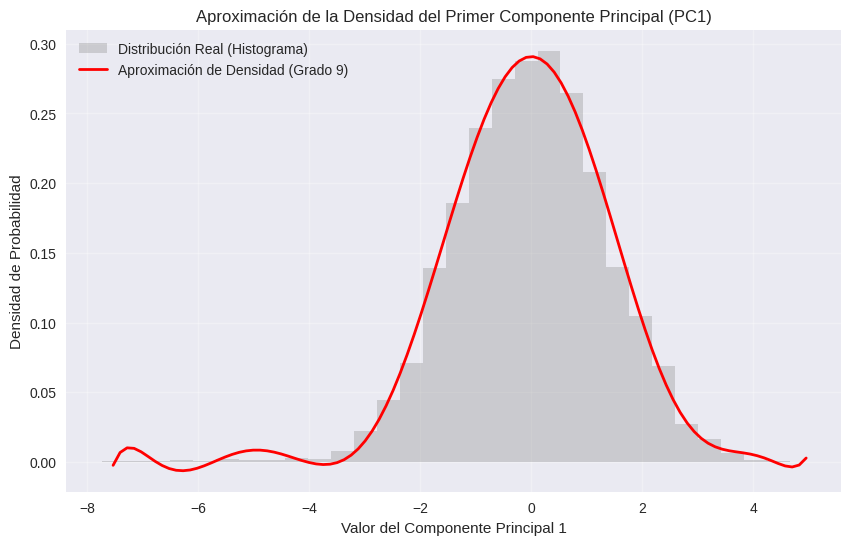

In [ ]:
X_pca_16np = X_pca_16.to_numpy()

#Extraemos el primer componente
pc1_16 = X_pca_16np[:, 0]
#print(pc1_16)

# generamos un histograma para tener los puntos discretos
counts_16, bin_edges_16 = np.histogram(pc1_16, bins=30, density=True)

# calculamos los puntos medios de cada bin
x_hist_c16 = (bin_edges_16[:-1] + bin_edges_16[1:]) / 2
y_hist_c16 = counts_16

# Aplicamos interpolacion
grado_i = 9 # tanteamos y probamos con varios grados pero consideramos un buen
#grado el 9
coefs_c16, error_c16 = interpolacion(x_hist_c16, y_hist_c16, grado_i)

print(f"Coeficientes obtenidos (a): {coefs_c16}")
print(f"Error residual: {error_c16:.4f}")

# Crear un dominio suave para que la linea se vea curva
x_suave_cp1 = np.linspace(x_hist_c16.min(), x_hist_c16.max()+0.5, 100)

# Calcular los valores Y para la línea suave usando los coeficientes 'a'
# La fórmula es: y = a0 + a1*x + a2*x^2 ...
# Usamos la matriz de Vandermonde de nuevo para hacer este cálculo rápido:
V_suave = matriz_vandermonde(x_suave_cp1, grado_i)
y_suave_cp1 = V_suave @ coefs_c16

plt.figure(figsize=(10, 6))

# Puntos originales (Histograma)
plt.hist(pc1_16, bins=30, density=True, alpha=0.3, color='gray', label='Distribución Real (Histograma)')

# Curva generada por la función
plt.plot(x_suave_cp1, y_suave_cp1, color='red', linewidth=2, label=f'Aproximación de Densidad (Grado {grado_i})')

plt.title(f"Aproximación de la Densidad del Primer Componente Principal (PC1)")
plt.xlabel("Valor del Componente Principal 1")
plt.ylabel("Densidad de Probabilidad")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Extrapolación/Predicción

In [ ]:
# primero tenemos que calcular la extrapolacion
def extrapolacion(x,coeficientes):
  """extrapolacion
  Funcion que implementa el metodo de extrapolacion, prediciendo
  valores para un rango fuera del original.
          y_predecidos = V_nuevo * a
  ---
  params:
    x: vector de rango a predecir
    coeficientes: vector de coeficientes encontrados con la interpolacion
  return:
    y_predecidos: vector de valores predecidos.
  """
  # Deducimos el grado del polinomio basado en cuantos coeficientes tenemos
  # Si coeficientes tiene longitud n+1, el grado es n
  grado = len(coeficientes) - 1

  # Construimos la matriz de Vandermonde para los nuevos puntos
  V_nuevos = matriz_vandermonde(x, grado)

  # Evaluamos el polinomio usando multiplicacion matricial
  y_predichos = V_nuevos @ coeficientes

  return y_predichos

Coeficientes obtenidos: [-5.40684745e-05  1.72075291e-02 -2.00397423e-01  7.18170445e-01
 -7.41036042e-01  2.10425935e-01]
Error residual: 0.0435


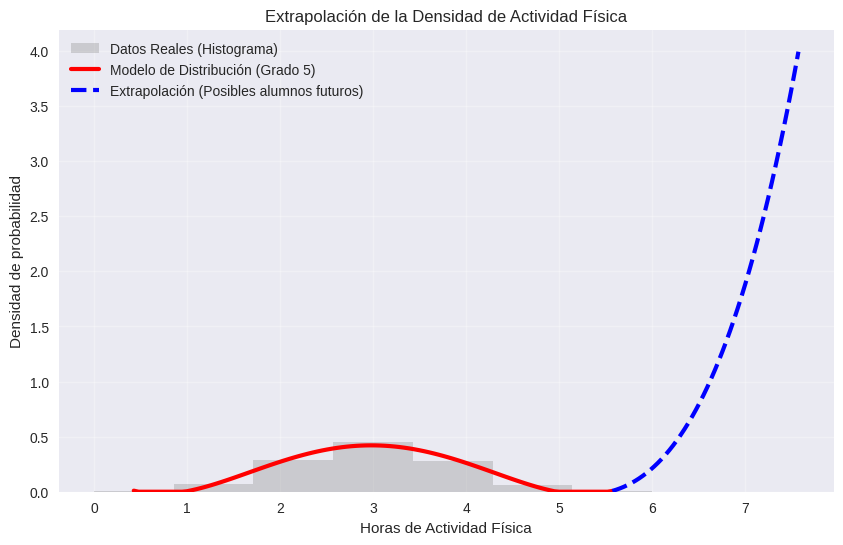

In [ ]:
datos_actividad = data['Physical_Activity'].values

# Usamos bins=7 para que coincida mejor con los enteros 0,1,2,3,4,5,6
counts, bin_edges = np.histogram(datos_actividad, bins=7, density=True)

# Calculamos los puntos medios (x_real)
x_hist_actividad = (bin_edges[:-1] + bin_edges[1:]) / 2
y_hist_actividad = counts # Esto es Frecuencia (Cantidad de alumnos)

# Interpolacion (Ajuste a los datos presentes)
grado_polinomio2 = 5 # Grado alto para ajustarse a las barras

coeficientes2, error2 = interpolacion(x_hist_actividad, y_hist_actividad, grado_polinomio2)

print(f"Coeficientes obtenidos: {coeficientes2}")
print(f"Error residual: {error2:.4f}")

# A. Curva Interpolada (Suave sobre los datos reales)
x_suave2 = np.linspace(x_hist_actividad.min(), x_hist_actividad.max(), 100)
V_suave2 = matriz_vandermonde(x_suave2, grado_polinomio2)
y_suave2 = V_suave2 @ coeficientes2
y_suave2 = np.maximum(y_suave2, 0) # No hay alumnos negativos

# B. Curva Extrapolada (Prediccion futura)
max_hora = x_hist_actividad.max()
# Predecimos de 6 horas hasta 9 horas
x_futuro = np.linspace(max_hora, max_hora + 2, 50)
V_futuro = matriz_vandermonde(x_futuro, grado_polinomio2)
y_futuro = V_futuro @ coeficientes2
y_futuro = np.maximum(y_futuro, 0) # Corrección física


plt.figure(figsize=(10, 6))
# Histograma real
plt.hist(datos_actividad, bins=7, alpha=0.3,density=True, color='gray', label='Datos Reales (Histograma)')
# Interpolacion
plt.plot(x_suave2, y_suave2, color='red', linewidth=3, label=f'Modelo de Distribución (Grado {grado_polinomio2})')
# Extrapolacion
plt.plot(x_futuro, y_futuro, color='blue', linestyle='--', linewidth=3, label='Extrapolación (Posibles alumnos futuros)')
plt.title(f"Extrapolación de la Densidad de Actividad Física")
plt.xlabel("Horas de Actividad Física")
plt.ylabel("Densidad de probabilidad")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

## Aplicación a nuestro caso de datos después de aplicar PCA

In [ ]:
# lo convertimos a numpy array para poder trabajar con todas las funciones
# con 16 componentes
X_pca_16np = X_pca_16.to_numpy()

# obtenemos la primera columna de todos (su componente 1)
pc1_16 = X_pca_16np[:, 0]

# generamos un histograma para tener los puntos discretos
counts_16, bin_edges_16 = np.histogram(pc1_16, bins=30, density=True)

# calculamos los puntos medios de cada bin
x_hist_c16 = (bin_edges_16[:-1] + bin_edges_16[1:]) / 2
y_hist_c16 = counts_16

# Aplicamos interpolacion
grado = 9 # tanteamos y probamos con varios grados pero consideramos un buen

coefs_c16, error_c16 = interpolacion(x_hist_c16, y_hist_c16, grado)
print(f"PCA 16 - Error de ajuste: {error_c16:.4f}")

PCA 16 - Error de ajuste: 0.0356


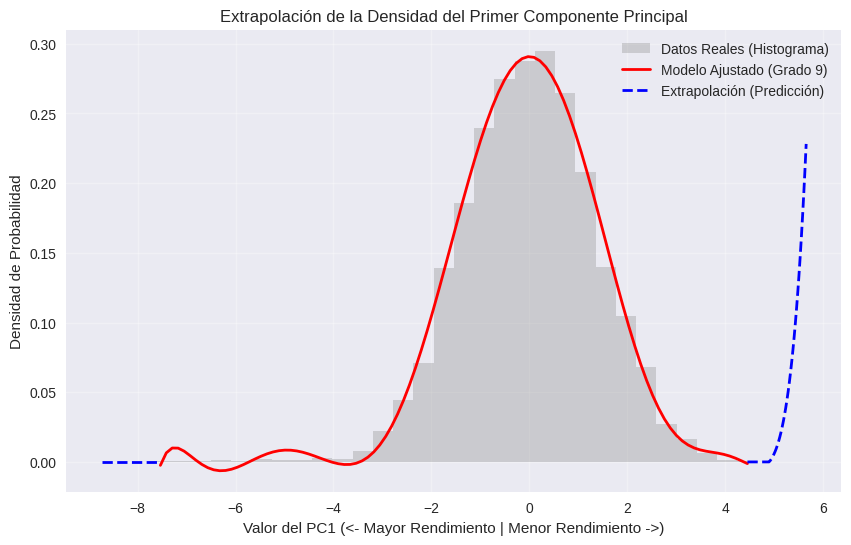

In [ ]:
# Aplicamos Extrapolacion para la densidad de PC1

x_suave_c16 = np.linspace(min(x_hist_c16)-1, max(x_hist_c16)+1, 100)
y_suave_c16 = extrapolacion(x_suave_c16, coefs_c16)
#y_suave_c16 = np.maximum(y_suave_c16, 0)
plt.figure(figsize=(10, 6))

# Definimos los limites de los datos reales
min_dato = x_hist_c16.min()
max_dato = x_hist_c16.max()

# Va desde el minimo hasta el maximo real
x_centro = np.linspace(min_dato, max_dato, 100)
y_centro = extrapolacion(x_centro, coefs_c16)
#y_centro = np.maximum(y_centro, 0) # Correccion para que la densidad no sea negativa

# Va desde un valor anterior hasta el minimo real
x_izq = np.linspace(min_dato - 1.2, min_dato, 50)
y_izq = extrapolacion(x_izq, coefs_c16)
y_izq = np.maximum(y_izq, 0)

# Va desde el maximo real hasta un valor futuro
x_der = np.linspace(max_dato, max_dato + 1.2, 50)
y_der = extrapolacion(x_der, coefs_c16)
y_der = np.maximum(y_der, 0)

# puntos originales
plt.hist(pc1_16, bins=30, density=True, alpha=0.3, color='gray', label='Datos Reales (Histograma)')

# linea interpolacion
plt.plot(x_centro, y_centro, color='red', linewidth=2, label=f'Modelo Ajustado (Grado {grado_i})')

# Extrapolacion
plt.plot(x_izq, y_izq, color='blue', linestyle='--', linewidth=2, label='Extrapolación (Predicción)')
plt.plot(x_der, y_der, color='blue', linestyle='--', linewidth=2)

plt.title(f"Extrapolación de la Densidad del Primer Componente Principal")
plt.xlabel("Valor del PC1 (<- Mayor Rendimiento | Menor Rendimiento ->)")
plt.ylabel("Densidad de Probabilidad")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Integral numérica para obtener densidad

In [ ]:
# usaremos la integral de riemman
def integral_riemann(x, y):
  """integral_riemann
  Calcula el area bajo la curva utilizando Sumas de Riemann con la
  Regla del Punto Medio. Aproxima la altura del rectangulo promediando los
  valores de y en los extremos del intervalo.
  ---
  params:
    x: Vector de variables independientes (eje horizontal). Dimension (m,).
       Se asume que estan ordenados ascendentemente.
    y: Vector de variables dependientes (alturas de la funcion). Dimension (m,).
  ---
  return:
    area: Valor flotante que representa el area total bajo la curva.
  """
  area = 0.0
  # Iteramos sobre los intervalos
  for i in range(len(x) - 1):
      # Base del rectangulo (dx)
      dx = x[i+1] - x[i]

      # Altura del rectangulo (Regla del Punto Medio: promedio de y[i] y y[i+1])
      altura_media = (y[i] + y[i+1]) / 2

      # Area = base * altura
      area += altura_media * dx

  return area

#  Integral numérica para obtener función integral (Opcional)

In [ ]:
def integral_acumulada_riemann(x, y):
  """integral_acumulada_riemann
  Calcula la funcion de distribucion acumulada (CDF) paso a paso utilizando
  Sumas de Riemann con la Regla del Punto Medio.
  ---
  params:
    x: Vector de variables independientes. Dimension (m,).
    y: Vector de densidades de probabilidad (PDF). Dimension (m,).
       Nota: 'y' debe estar normalizado.
  ---
  return:
    y_cdf: Vector de probabilidades acumuladas. Dimension (m,).
           y_cdf[i] representa la probabilidad acumulada hasta x[i].
  """
  y_cdf = np.zeros_like(y)
  acumulado = 0.0

  for i in range(1, len(x)):
      dx = x[i] - x[i-1]

      # Altura estimada en el punto medio del intervalo
      altura_media = (y[i] + y[i-1]) / 2

      area_rectangulo = altura_media * dx

      acumulado += area_rectangulo
      y_cdf[i] = acumulado

  return y_cdf

## Aplicacion a caso de actividad física

In [ ]:
# Usamos el dominio suave que ya creamos (x_suave2) y la curva interpolada (y_suave2)
# La densidad no puede ser negativa (por si el polinomio oscila abajo de 0)
y_suave2 = np.maximum(y_suave2, 0)

area_total2 = integral_riemann(x_suave2, y_suave2)
print(f"Área bajo curva original: {area_total2:.4f}")

# Normalizamos
y_pdf2 = y_suave2 / area_total2
area_norm2 = integral_riemann(x_suave2, y_pdf2)
print(f"Área después de normalizar: {area_norm2:.4f}")

# Valor Esperado E[X]
integrando2 = x_suave2 * y_pdf2
valor_esperado2 = integral_riemann(x_suave2, integrando2)
print(f"Valor Esperado (E[X]): {valor_esperado2:.4f}")

# Acumulada (CDF)
y_cdf2 = integral_acumulada_riemann(x_suave2, y_pdf2)

Área bajo curva original: 0.9827
Área después de normalizar: 1.0000
Valor Esperado (E[X]): 2.9800


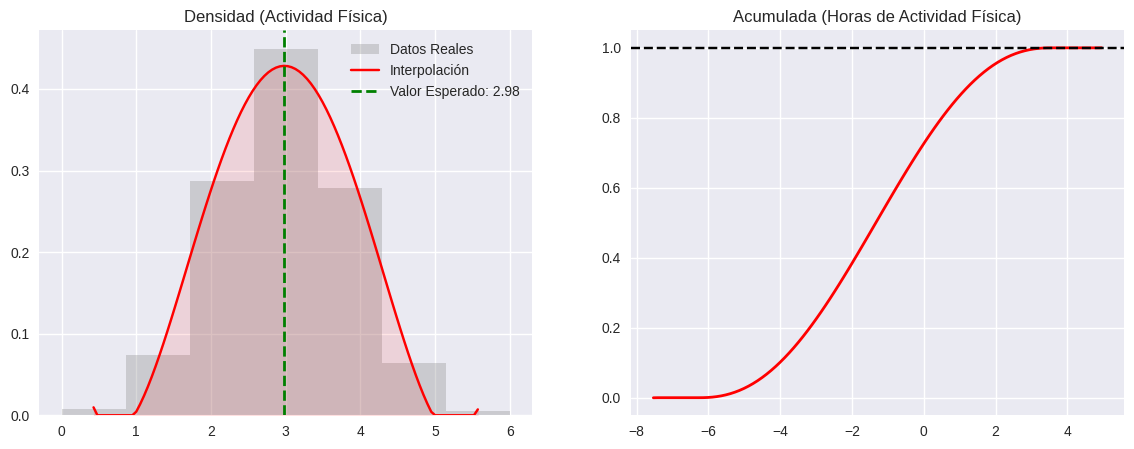

In [ ]:
# Podemos visualizar nuestros resultados para la actividad fisica
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# densidad
ax1.hist(datos_actividad, bins=7, density=True, alpha=0.3, color='gray', label='Datos Reales')
ax1.plot(x_suave2, y_pdf2, color='red', label='Interpolación')
ax1.axvline(valor_esperado2, color='green', linestyle='--', linewidth=2, label=f'Valor Esperado: {valor_esperado2:.2f}')
#ax1.plot(x_suave, y_pdf, color='red', linewidth=2, label='PDF (Riemann)')
ax1.set_title('Densidad (Actividad Física)')
ax1.fill_between(x_suave2, y_pdf2, alpha=0.1, color='red')
ax1.legend()

# acumulada
ax2.plot(x_suave_cp1, y_cdf2, color='red', linewidth=2, label='CDF')
ax2.axhline(1, color='black', linestyle='--')
ax2.set_title('Acumulada (Horas de Actividad Física)')
plt.show()



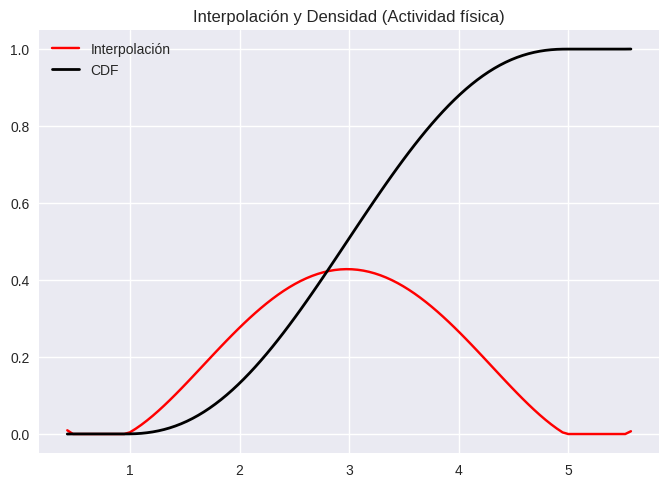

In [ ]:
plt.plot(x_suave2, y_pdf2, color='red', label='Interpolación')
plt.plot(x_suave2, y_cdf2, color='black', linewidth=2, label='CDF')
plt.title('Interpolación y Densidad (Actividad física)')
plt.legend()
plt.show()

## Aplicación a nuestro caso de datos después de aplicar PCA

In [ ]:
# Aplicamos integral de Riemman
area_total = integral_riemann(x_suave_cp1, y_suave_cp1)
print(f"Área bajo curva original: {area_total:.4f}")

y_pdf_cp1 = y_suave_cp1  / area_total # normalizamos
area_check = integral_riemann(x_suave_cp1, y_pdf_cp1)
print(f"Área después de normalizar: {area_check:.4f}")


# calculamos el valor esperado
# Formula: Integral(x * f(x) dx)
integrando = x_suave_cp1 * y_pdf_cp1
valor_esperado = integral_riemann(x_suave_cp1, integrando)
print(f"Valor Esperado (E[X]): {valor_esperado:.4f}")

# calculamos la acumulada
y_cdf_cp1 = integral_acumulada_riemann(x_suave_cp1, y_pdf_cp1)

Área bajo curva original: 1.0012
Área después de normalizar: 1.0000
Valor Esperado (E[X]): -0.0277


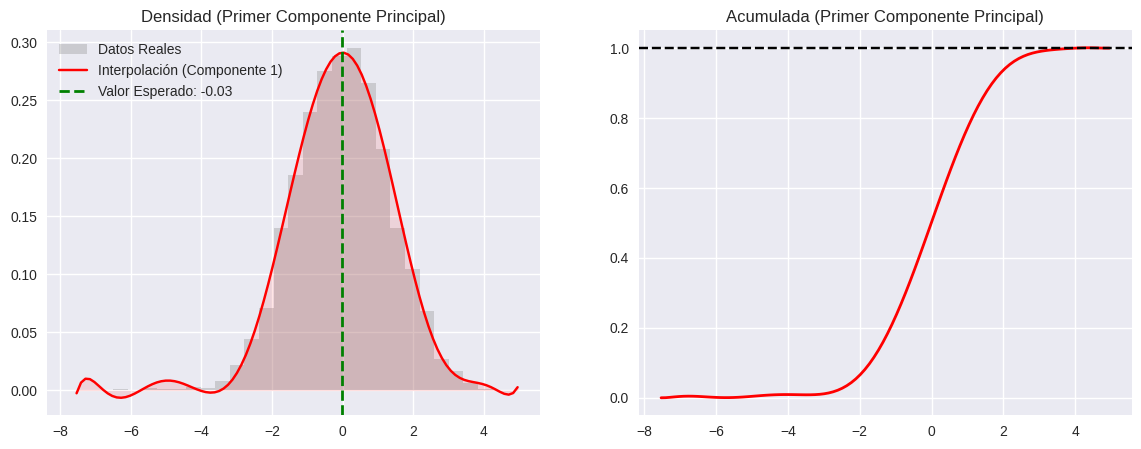

In [ ]:
# Podemos visualizar nuestros resultados para la componente principal 1
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# densidad
ax1.hist(pc1_16, bins=30, density=True, alpha=0.3, color='gray', label='Datos Reales')
ax1.plot(x_suave_cp1, y_suave_cp1, color='red', label='Interpolación (Componente 1)')
ax1.axvline(valor_esperado, color='green', linestyle='--', linewidth=2, label=f'Valor Esperado: {valor_esperado:.2f}')
#ax1.plot(x_suave, y_pdf, color='red', linewidth=2, label='PDF (Riemann)')
ax1.set_title('Densidad (Primer Componente Principal)')
ax1.fill_between(x_suave_cp1, y_suave_cp1, alpha=0.1, color='red')
ax1.legend()

# acumulada
ax2.plot(x_suave_cp1, y_cdf_cp1, color='red', linewidth=2, label='CDF')
ax2.axhline(1, color='black', linestyle='--')
ax2.set_title('Acumulada (Primer Componente Principal)')
plt.show()

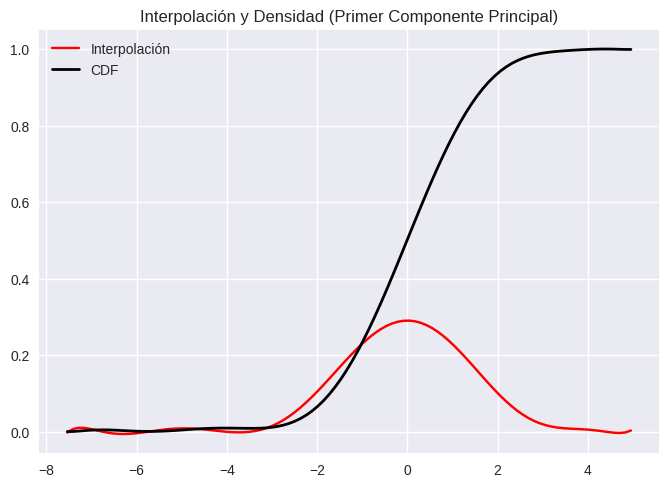

In [ ]:
plt.plot(x_suave_cp1, y_pdf_cp1, color='red', label='Interpolación')
plt.plot(x_suave_cp1, y_cdf_cp1, color='black', linewidth=2, label='CDF')
plt.legend()
plt.title('Interpolación y Densidad (Primer Componente Principal)')
plt.legend()
plt.show()